## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***

In [5]:
url = '/Users/arpanganguli/Documents/Professional/Analysis/ISLR/Datasets/USArrests.csv'
USArrests = pd.read_csv(url, index_col='Unnamed: 0')
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
list(USArrests)

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [7]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

***

### Principal Components Analysis

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
import warnings
warnings.filterwarnings('ignore')
df = pd.DataFrame(StandardScaler().fit_transform(USArrests))

In [64]:
df.columns = USArrests.columns
df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null float64
UrbanPop    50 non-null float64
Rape        50 non-null float64
dtypes: float64(4)
memory usage: 1.6 KB


In [69]:
df_mean = pd.DataFrame(df.mean(), columns=['mean'])
df_std = pd.DataFrame(df.std(), columns=['standard deviation'])
df_moments = pd.concat([df_mean, df_std], axis=1)
df_moments

,mean,standard deviation
Murder,-8.437695e-17,1.010153
Assault,1.298961e-16,1.010153
UrbanPop,-4.263256e-16,1.010153
Rape,8.326673e-16,1.010153


In [94]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df)
principalDf = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
principalDf.head()

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [95]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
PC1    50 non-null float64
PC2    50 non-null float64
PC3    50 non-null float64
PC4    50 non-null float64
dtypes: float64(4)
memory usage: 1.6 KB


In [100]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=principalDf.columns)
loadings_df

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [101]:
principalDf.shape

(50, 4)

In [122]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, shrinkC=0, shrinkD=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

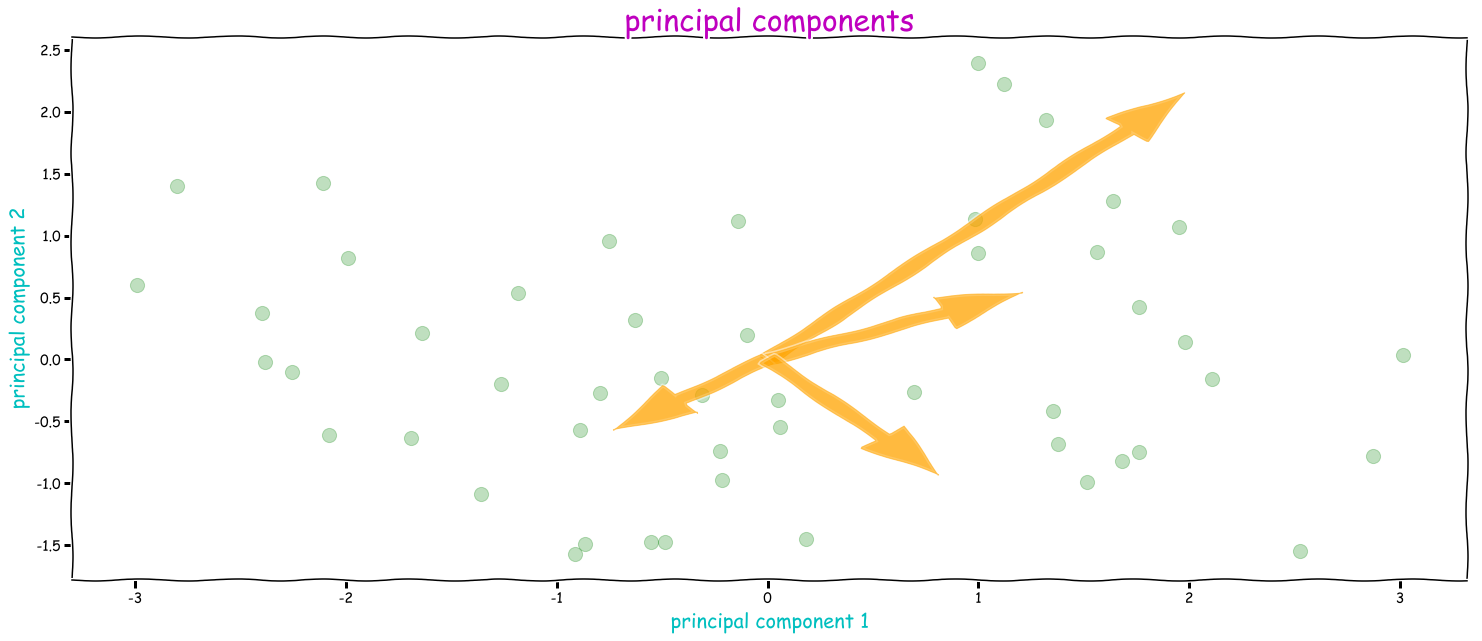

In [172]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.25, s=200, color='green')
plt.title('principal components', fontsize=30, color='m')
plt.xlabel('principal component 1', fontsize=20, color='c')
plt.ylabel('principal component 2', fontsize=20, color='c')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    arrow = plt.arrow(0, 0, pca.mean_[0] + v[0], pca.mean_[1] + v[1], label='mylabel', 
                      width=0.09, facecolor='orange', edgecolor='orange', alpha=0.5, )

In [181]:
PSTD = np.sqrt(pca.explained_variance_)
PSTD

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [179]:
PEV = pca.explained_variance_
PEV

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [183]:
PVE = pca.explained_variance_ratio_
PVE

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0.5,1,'principal components cumulative explained variance')

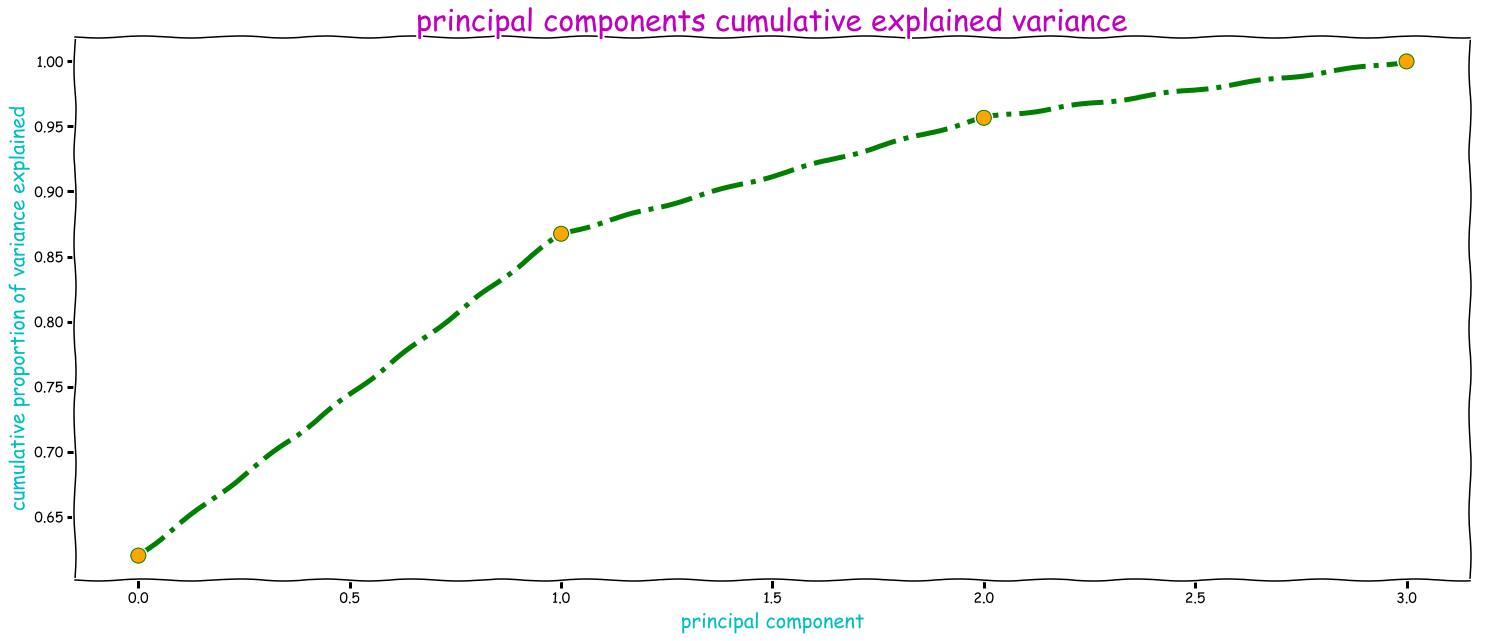

In [194]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(np.cumsum(PVE), lw=5.0, ls='-.', color='g', marker='o', markersize=15, markerfacecolor='orange')
plt.xlabel('principal component', fontsize=20, color='c')
plt.ylabel('cumulative proportion of variance explained', fontsize=20, color='c')
plt.title('principal components cumulative explained variance', fontsize=30, color='m')